In [15]:
#Importing dependencies
import requests
import json
from pprint import pprint
from yelp.client import Client
from newfileLR import key
from urllib.parse import quote
import pandas as pd
import numpy as np
import time 
import gmaps
from newfileLR import gkey
import matplotlib.pyplot as plt
gmaps.configure(api_key=gkey)
API_KEY = key


API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.
%matplotlib notebook

In [4]:
#Creating the function to request the Yelp API
def search_bars(set_num): 
# This function launches the request for all grocery location endpoints in San Francisco, CA.
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {
        'Authorization': 'Bearer {}'.format(key),
    }
    url_params = { #parameters passed to the API
    "categories": 'bars',
    "location":"Los Angeles",
    "state": "California",
    'offset': offset_num, # We are going to iterate the offset
     "limit":50 # Maximum return of results per request (ref: API documentation).
     }
    response = requests.get(url, headers=headers, params=url_params)
    return response.json() # Returns a JSON.


In [5]:
#Requesting the 500 business from the Yelp API
if __name__ == "__main__":
    for offset_num in np.arange(50,550,50) : 
# I want up to 550 results, in steps of 50 results per request.
        try:
            output_json = search_bars(offset_num) # Executing the function defined above.
            print(offset_num) # Making sure each offset iteration is running
            print(output_json) # If you wanna check the JSON for each iteration
            if offset_num == 50:
                df_first = pd.DataFrame.from_dict(output_json['businesses'])
# 'businesses' because that's the primary key of the JSON (i.e. pull all attribute data by calling 
# that one key). This is something you can figure out reading the API documentation or visually
# parsing the JSON. 
            else:
                df2 = pd.DataFrame.from_dict(output_json['businesses'])
                df_first = df_first.append(df2)
# The conditional statement above is so that I can append my results into a single dataframe, to 
# save into a single csv document.
        except AttributeError:
            print("error at ", offset_num) # Helpful for debugging purposes
    df_first.to_csv("output_data.csv", index = False)

50
{'businesses': [{'id': '81kXeyBt1AKiJC_HITT9KA', 'alias': 'blue-cow-kitchen-and-bar-los-angeles-2', 'name': 'Blue Cow Kitchen & Bar', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/6rG8Ih9Nk5tvUCRgYypNfg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/blue-cow-kitchen-and-bar-los-angeles-2?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 1293, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'bars', 'title': 'Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 34.051479, 'longitude': -118.251659}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '350 S Grand Ave', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90071', 'country': 'US', 'state': 'CA', 'display_address': ['350 S Grand Ave', 'Los Angeles, CA 90071']}, 'phone': '+12136212249', 'display_phone': '(213) 621-2249', 'distance': 6520.6309

100
{'businesses': [{'id': '8Qzn5u9FotudVId86mu4vg', 'alias': 'the-little-easy-los-angeles-2', 'name': 'The Little Easy', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/8HPgiDJsKax3sIgQI6uPUQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-little-easy-los-angeles-2?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 1057, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'lounges', 'title': 'Lounges'}, {'alias': 'cajun', 'title': 'Cajun/Creole'}], 'rating': 4.0, 'coordinates': {'latitude': 34.04758, 'longitude': -118.25036}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '216 W 5th St', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90013', 'country': 'US', 'state': 'CA', 'display_address': ['216 W 5th St', 'Los Angeles, CA 90013']}, 'phone': '+12136283113', 'display_phone': '(213) 628

150
{'businesses': [{'id': 'NxcF38OxJN9Iq6g6xoOAnQ', 'alias': 'heres-looking-at-you-los-angeles', 'name': "Here's Looking At You", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/4Z0VimuG9xs0iWuV14fFYQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/heres-looking-at-you-los-angeles?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 502, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}], 'rating': 4.0, 'coordinates': {'latitude': 34.0637, 'longitude': -118.30822}, 'transactions': ['delivery'], 'price': '$$$', 'location': {'address1': '3901 W 6th St', 'address2': None, 'address3': '', 'city': 'Los Angeles', 'zip_code': '90020', 'country': 'US', 'state': 'CA', 'display_address': ['3901 W 6th St', 'Los Angeles, CA 90020']}, 'phone': '+12135683573', 'display_pho

200
{'businesses': [{'id': 'IO94U9tWIVuw93g2ahEyEQ', 'alias': 'loupiotte-kitchen-los-angeles-2', 'name': 'Loupiotte Kitchen', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ht3iQ-SZOZQb46hnXiQRug/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/loupiotte-kitchen-los-angeles-2?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 147, 'categories': [{'alias': 'french', 'title': 'French'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.5, 'coordinates': {'latitude': 34.1023816986214, 'longitude': -118.291617810179}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '1726 N Vermont Ave', 'address2': '', 'address3': None, 'city': 'Los Angeles', 'zip_code': '90027', 'country': 'US', 'state': 'CA', 'display_address': ['1726 N Vermont Ave', 'Los Angeles, CA 90027']}, 'phone': '+132344527

250
{'businesses': [{'id': 'psQM_iI-kYbNAJT2KVKJgQ', 'alias': 'star-hookah-lounge-of-los-angeles-los-angeles', 'name': 'Star Hookah Lounge of Los Angeles', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/dKDuj_bId-zhZYABs4SGFg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/star-hookah-lounge-of-los-angeles-los-angeles?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 138, 'categories': [{'alias': 'hookah_bars', 'title': 'Hookah Bars'}], 'rating': 4.5, 'coordinates': {'latitude': 34.087121, 'longitude': -118.291504}, 'transactions': [], 'price': '$$', 'location': {'address1': '864 N Vermont Ave', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90029', 'country': 'US', 'state': 'CA', 'display_address': ['864 N Vermont Ave', 'Los Angeles, CA 90029']}, 'phone': '+13239282800', 'display_phone': '(323) 928-2800', 'distance': 3953.715518273358}, {'id': '1

300
{'businesses': [{'id': 'KOj4TvBuvRLXlBuG2vrZeQ', 'alias': 'the-know-where-bar-los-angeles', 'name': 'The Know Where Bar', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RZXuTsnOGw7uymAYdDsJ_Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-know-where-bar-los-angeles?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 230, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'jazzandblues', 'title': 'Jazz & Blues'}, {'alias': 'pubs', 'title': 'Pubs'}], 'rating': 4.0, 'coordinates': {'latitude': 34.10148, 'longitude': -118.3127424}, 'transactions': [], 'price': '$$', 'location': {'address1': '5634 Hollywood Blvd', 'address2': None, 'address3': '', 'city': 'Los Angeles', 'zip_code': '90028', 'country': 'US', 'state': 'CA', 'display_address': ['5634 Hollywood Blvd', 'Los Angeles, CA 90028']}, 'phone': '+13238714108', 'display_phone': '(323) 

350
{'businesses': [{'id': 'koAIofFAgzs3ewEYJyUjgg', 'alias': 'el-zarape-melrose-los-angeles', 'name': 'El Zarape Melrose', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/XlQLmfq0yJKek5QxRIAqZw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/el-zarape-melrose-los-angeles?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 153, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'beerbar', 'title': 'Beer Bar'}], 'rating': 4.5, 'coordinates': {'latitude': 34.0836649, 'longitude': -118.305518}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '4809 Melrose Ave', 'address2': '', 'address3': None, 'city': 'Los Angeles', 'zip_code': '90029', 'country': 'US', 'state': 'CA', 'display_address': ['4809 Melrose Ave', 'Los Angeles, CA 90029']}, 'phone': '+13238484609', 'displ

400
{'businesses': [{'id': 'KGP8ock5YIqlgm_e5IfD1A', 'alias': 'the-blending-lab-winery-los-angeles', 'name': 'The Blending Lab Winery', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/6BfiXHrmfhelsDoYbb9Shw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-blending-lab-winery-los-angeles?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 66, 'categories': [{'alias': 'winetastingroom', 'title': 'Wine Tasting Room'}, {'alias': 'winetasteclasses', 'title': 'Wine Tasting Classes'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}], 'rating': 4.5, 'coordinates': {'latitude': 34.0715753, 'longitude': -118.363153593848}, 'transactions': [], 'price': '$$', 'location': {'address1': '7948 W 3rd St', 'address2': None, 'address3': '', 'city': 'Los Angeles', 'zip_code': '90048', 'country': 'US', 'state': 'CA', 'display_address': ['7948 W 3rd St', 'Los Angeles, CA 90048']}, 'phone': '+

450
{'businesses': [{'id': 'mTSI7bG_Sp7XxiVno0PM6w', 'alias': 'hollywood-club-crawl-hollywood', 'name': 'Hollywood Club Crawl', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/t4onFUZ8gxhbHgqphzi20Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/hollywood-club-crawl-hollywood?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 293, 'categories': [{'alias': 'danceclubs', 'title': 'Dance Clubs'}, {'alias': 'bars', 'title': 'Bars'}, {'alias': 'clubcrawl', 'title': 'Club Crawl'}], 'rating': 4.5, 'coordinates': {'latitude': 34.0998, 'longitude': -118.32648}, 'transactions': [], 'price': '$', 'location': {'address1': '', 'address2': None, 'address3': '', 'city': 'Hollywood', 'zip_code': '90028', 'country': 'US', 'state': 'CA', 'display_address': ['Hollywood, CA 90028']}, 'phone': '+13236676282', 'display_phone': '(323) 667-6282', 'distance': 4424.733221753789}, {'id': 'k7uDQ8

500
{'businesses': [{'id': 'kSdMKsIJ5P0qmTurkS9bfw', 'alias': 'wolfgang-puck-bar-and-grill-los-angeles-2', 'name': 'Wolfgang Puck Bar & Grill', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/43WC2EgfF428w_gbs4nG6w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/wolfgang-puck-bar-and-grill-los-angeles-2?adjust_creative=5qqcMYzSx5kiXGxs0PXU2w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5qqcMYzSx5kiXGxs0PXU2w', 'review_count': 930, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'bars', 'title': 'Bars'}, {'alias': 'venues', 'title': 'Venues & Event Spaces'}], 'rating': 2.5, 'coordinates': {'latitude': 34.0445594289176, 'longitude': -118.265931553442}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '800 West Olympic Blvd', 'address2': 'Ste A 180', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90015', 'country': 'US', 'state': 'CA', 'display_address': ['800 West Olympic Blvd', 

In [6]:
#Making sure 500 bars were requested
df_first.count()

id               500
alias            500
name             500
image_url        500
is_closed        500
url              500
review_count     500
categories       500
rating           500
coordinates      500
transactions     500
price            486
location         500
phone            500
display_phone    500
distance         500
dtype: int64

In [7]:
#Creating empty lat/long columns to extract the coordinates
df_first["lat"] = np.nan
df_first["long"] = np.nan

df_first.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long
0,81kXeyBt1AKiJC_HITT9KA,blue-cow-kitchen-and-bar-los-angeles-2,Blue Cow Kitchen & Bar,https://s3-media2.fl.yelpcdn.com/bphoto/6rG8Ih...,False,https://www.yelp.com/biz/blue-cow-kitchen-and-...,1293,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.051479, 'longitude': -118.251659}",[delivery],$$,"{'address1': '350 S Grand Ave', 'address2': ''...",+12136212249,(213) 621-2249,6520.630986,NaN,NaN
1,veyBgbOjIHv7npz7eHf1NQ,eightytwo-los-angeles-2,EightyTwo,https://s3-media2.fl.yelpcdn.com/bphoto/kE7_Hy...,False,https://www.yelp.com/biz/eightytwo-los-angeles...,1498,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 34.045368, 'longitude': -118.237335}",[],$$,"{'address1': '707 E 4th Pl', 'address2': '', '...",+12136268200,(213) 626-8200,7941.361716,NaN,NaN
2,EjRBYCUq2sx-TH77zubUfw,far-bar-los-angeles-4,Far Bar,https://s3-media2.fl.yelpcdn.com/bphoto/W82kCJ...,False,https://www.yelp.com/biz/far-bar-los-angeles-4...,1944,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",3.5,"{'latitude': 34.04973, 'longitude': -118.23944}","[delivery, pickup]",$$,"{'address1': '347 E 1st St', 'address2': '', '...",+12136179990,(213) 617-9990,7660.318190,NaN,NaN
3,N05X5dnwzpWvLg7ZRcMtcA,escala-los-angeles-2,Escala,https://s3-media3.fl.yelpcdn.com/bphoto/VjuDHX...,False,https://www.yelp.com/biz/escala-los-angeles-2?...,1144,"[{'alias': 'colombian', 'title': 'Colombian'},...",4.0,"{'latitude': 34.06373, 'longitude': -118.296869}","[restaurant_reservation, delivery]",$$,"{'address1': '3451 W 6th St', 'address2': '', ...",+12133871113,(213) 387-1113,2270.436507,NaN,NaN
4,qA9Dqezi-kqbIBtM3c07Ew,manuela-los-angeles-2,Manuela,https://s3-media1.fl.yelpcdn.com/bphoto/_PMjUV...,False,https://www.yelp.com/biz/manuela-los-angeles-2...,922,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.04608, 'longitude': -118.23489}",[delivery],$$,"{'address1': '907 E 3rd St', 'address2': '', '...",+13238490480,(323) 849-0480,8153.413455,NaN,NaN


In [109]:
#Empty list to store latitude and longitude data
lat = []
long = []

In [8]:
#List comprehension that extracts latitude and longitude for their respective lists
lat = [lat["latitude"] for lat in df_first["coordinates"]]
long = [lon["longitude"] for lon in df_first["coordinates"]]

In [9]:
#Input the list for each coordinate back into the dataframe columns for lat and long
df_first["lat"] = lat
df_first["long"] = long

df_first.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long
0,81kXeyBt1AKiJC_HITT9KA,blue-cow-kitchen-and-bar-los-angeles-2,Blue Cow Kitchen & Bar,https://s3-media2.fl.yelpcdn.com/bphoto/6rG8Ih...,False,https://www.yelp.com/biz/blue-cow-kitchen-and-...,1293,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.051479, 'longitude': -118.251659}",[delivery],$$,"{'address1': '350 S Grand Ave', 'address2': ''...",+12136212249,(213) 621-2249,6520.630986,34.051479,-118.251659
1,veyBgbOjIHv7npz7eHf1NQ,eightytwo-los-angeles-2,EightyTwo,https://s3-media2.fl.yelpcdn.com/bphoto/kE7_Hy...,False,https://www.yelp.com/biz/eightytwo-los-angeles...,1498,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 34.045368, 'longitude': -118.237335}",[],$$,"{'address1': '707 E 4th Pl', 'address2': '', '...",+12136268200,(213) 626-8200,7941.361716,34.045368,-118.237335
2,EjRBYCUq2sx-TH77zubUfw,far-bar-los-angeles-4,Far Bar,https://s3-media2.fl.yelpcdn.com/bphoto/W82kCJ...,False,https://www.yelp.com/biz/far-bar-los-angeles-4...,1944,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",3.5,"{'latitude': 34.04973, 'longitude': -118.23944}","[delivery, pickup]",$$,"{'address1': '347 E 1st St', 'address2': '', '...",+12136179990,(213) 617-9990,7660.318190,34.049730,-118.239440
3,N05X5dnwzpWvLg7ZRcMtcA,escala-los-angeles-2,Escala,https://s3-media3.fl.yelpcdn.com/bphoto/VjuDHX...,False,https://www.yelp.com/biz/escala-los-angeles-2?...,1144,"[{'alias': 'colombian', 'title': 'Colombian'},...",4.0,"{'latitude': 34.06373, 'longitude': -118.296869}","[restaurant_reservation, delivery]",$$,"{'address1': '3451 W 6th St', 'address2': '', ...",+12133871113,(213) 387-1113,2270.436507,34.063730,-118.296869
4,qA9Dqezi-kqbIBtM3c07Ew,manuela-los-angeles-2,Manuela,https://s3-media1.fl.yelpcdn.com/bphoto/_PMjUV...,False,https://www.yelp.com/biz/manuela-los-angeles-2...,922,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.04608, 'longitude': -118.23489}",[delivery],$$,"{'address1': '907 E 3rd St', 'address2': '', '...",+13238490480,(323) 849-0480,8153.413455,34.046080,-118.234890


In [10]:
#Saved the data to csv file
df_first.to_csv("output_data.csv", index = False)

In [20]:
#Sorted the data by review count for popular bars
df_sorted = df_first.sort_values(by=['review_count'], ascending = False)

df_sorted.head(10)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long
13,oZn4oaOKOI-HcUGecfG4Vw,the-penthouse-at-mastros-beverly-hills,The Penthouse at Mastro's,https://s3-media2.fl.yelpcdn.com/bphoto/-zlW4k...,False,https://www.yelp.com/biz/the-penthouse-at-mast...,4650,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 34.0689333, 'longitude': -118.398...",[delivery],$$$$,"{'address1': '246 N Canon Dr', 'address2': 'Fl...",+13108888782,(310) 888-8782,7173.096241,34.068933,-118.398747
10,EWbbiUBkGzCYrEoOF05HzA,gracias-madre-west-hollywood-west-hollywood,Gracias Madre - West Hollywood,https://s3-media2.fl.yelpcdn.com/bphoto/6T9Y99...,False,https://www.yelp.com/biz/gracias-madre-west-ho...,4101,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",4.0,"{'latitude': 34.0807951106153, 'longitude': -1...","[delivery, pickup]",$$,"{'address1': '8905 Melrose Ave', 'address2': '...",+13239782170,(323) 978-2170,6407.786762,34.080795,-118.386972
23,B-JY4uOniEo9WHbz1i8mig,taste-on-melrose-west-hollywood-2,Taste on Melrose,https://s3-media1.fl.yelpcdn.com/bphoto/noYroc...,False,https://www.yelp.com/biz/taste-on-melrose-west...,2627,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.0825734070693, 'longitude': -1...","[delivery, pickup]",$$,"{'address1': '8454 Melrose Ave', 'address2': N...",+13238526888,(323) 852-6888,5445.331687,34.082573,-118.374798
13,M1N8QH15HzL5wsJX0Me_ow,granville-glendale,GRANVILLE,https://s3-media3.fl.yelpcdn.com/bphoto/0VWGME...,False,https://www.yelp.com/biz/granville-glendale?ad...,2622,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.1451088111189, 'longitude': -1...","[pickup, delivery, restaurant_reservation]",$$,"{'address1': '807 Americana Way', 'address2': ...",+18185500472,(818) 550-0472,11112.918681,34.145109,-118.255093
39,_vFkAGFg9lAPRxG7gy3dQw,fig-and-olive-melrose-place-west-hollywood-2,Fig & Olive - Melrose Place,https://s3-media2.fl.yelpcdn.com/bphoto/XvQ1sL...,False,https://www.yelp.com/biz/fig-and-olive-melrose...,2488,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.0,"{'latitude': 34.0834751, 'longitude': -118.376...","[delivery, pickup]",$$$,"{'address1': '8490 Melrose Pl', 'address2': ''...",+13103609100,(310) 360-9100,5598.508852,34.083475,-118.376174
28,IDno0e16u1Xz5VsmJJ20vA,pump-restaurant-west-hollywood,PUMP Restaurant,https://s3-media4.fl.yelpcdn.com/bphoto/NGUQGJ...,False,https://www.yelp.com/biz/pump-restaurant-west-...,2408,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",3.5,"{'latitude': 34.0837127, 'longitude': -118.385...",[delivery],$$$,"{'address1': '8948 Santa Monica Blvd', 'addres...",+13106577867,(310) 657-7867,6376.838003,34.083713,-118.385255
29,S3z6erO2TeljEc-dTPqc9Q,firefly-studio-city,Firefly,https://s3-media4.fl.yelpcdn.com/bphoto/yTDw18...,False,https://www.yelp.com/biz/firefly-studio-city?a...,2226,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.141468, 'longitude': -118.388418}",[delivery],$$$,"{'address1': '11720 Ventura Blvd', 'address2':...",+18187621833,(818) 762-1833,10816.188998,34.141468,-118.388418
29,WToFoJxaOlCLijJKkd0UxA,the-abbey-food-and-bar-west-hollywood,The Abbey Food & Bar,https://s3-media3.fl.yelpcdn.com/bphoto/fwMvur...,False,https://www.yelp.com/biz/the-abbey-food-and-ba...,2192,"[{'alias': 'gaybars', 'title': 'Gay Bars'}, {'...",3.5,"{'latitude': 34.08361, 'longitude': -118.3853751}",[delivery],$$,"{'address1': '696 N Robertson Blvd', 'address2...",+13102898410,(310) 289-8410,6375.730813,34.083610,-118.385375
11,Y3Wabu0ooqg9Cr5_QeAedA,kitchen-24-hollywood-3,Kitchen 24,https://s3-media2.fl.yelpcdn.com/bphoto/X5gxRl...,False,https://www.yelp.com/biz/kitchen-24-hollywood-...,2146,"[{'alias': 'diners', 'title': 'Diners'}, {'ali...",3.5,"{'latitude': 34.1003728128631, 'longitude': -1...","[delivery, pickup]",$$,"{'address1': '1608 N Cahuenga Blvd', 'address2...",+13234652424,(3

In [114]:
#Converting the data type for lat and long as float
df_sorted["lat"] = df_sorted["lat"].astype(float)
df_sorted["long"] = df_sorted["long"].astype(float)

In [12]:
#Created empty list to extract lat longs and combine the two
locations = []
#combine it into a tuple and append it to locations
for index, row in df_sorted.iterrows():
    
    locations.append((row['lat'], row['long']))
    
locations

#df_locations

[(34.0689333, -118.3987465),
 (34.0807951106153, -118.386972025037),
 (34.0825734070693, -118.374798180805),
 (34.1451088111189, -118.25509250164),
 (34.0834751, -118.3761741),
 (34.0837127, -118.3852555),
 (34.141468, -118.388418),
 (34.08361, -118.3853751),
 (34.1003728128631, -118.329342038014),
 (34.0454, -118.25294),
 (34.0676057, -118.3976687),
 (34.04973, -118.23944),
 (34.1431440622596, -118.402830060188),
 (34.095603, -118.37238),
 (34.059648, -118.289799),
 (34.024275, -118.394556),
 (34.101802, -118.335394),
 (34.09769, -118.35205),
 (34.0921328, -118.3805803),
 (34.06617, -118.39872),
 (34.0501911926812, -118.256970106494),
 (34.14317, -118.3911),
 (34.045368, -118.237335),
 (34.0219647, -118.3962699),
 (33.99689, -118.42654),
 (34.0906651, -118.3642799),
 (34.039642, -118.428946),
 (34.048593, -118.25917),
 (34.0905573, -118.3700477),
 (33.96185, -118.4214),
 (34.0223554, -118.4099716),
 (34.125675145001, -118.264257899961),
 (34.0771299, -118.38068),
 (34.1014405415506, -

In [13]:
# Plotted Heatmap to test the gmaps module
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=.05,
                                 point_radius=0.005)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
reduced_df = df_sorted.loc[:, ['name', 'review_count']]


top_10_list = reduced_df.loc[(
    reduced_df["review_count"] > 2010)]

top_10_list
#df_bar_chart = pd.DataFrame(top_10_list)

#df_bar_chart

,name,review_count
13,The Penthouse at Mastro's,4650
10,Gracias Madre - West Hollywood,4101
23,Taste on Melrose,2627
13,GRANVILLE,2622
39,Fig & Olive - Melrose Place,2488
28,PUMP Restaurant,2408
29,Firefly,2226
29,The Abbey Food & Bar,2192
11,Kitchen 24,2146
10,Clifton's Republic,2011


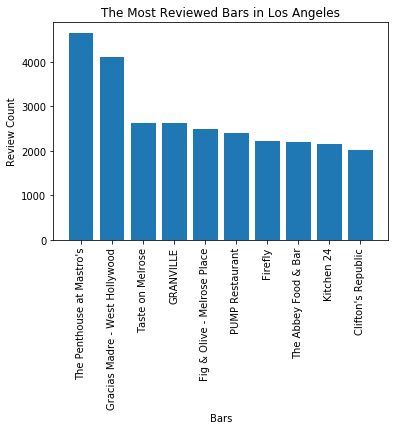

In [63]:
fig, ax = plt.subplots()

ax.bar(top_10_list['name'],top_10_list['review_count'])
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_title('The Most Reviewed Bars in Los Angeles')
ax.set_xlabel('Bars')
ax.set_ylabel('Review Count')
#plt.gcf().subplots_adjust(bottom=0.5)
fig.savefig('MostReviewedBars.png', bbox_inches='tight');